# <center> Exploratory Data Analysis


## Importing Dependecies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

## Dataset first look

 Before performing more detailed data exploration we will first load the `stores_sales.csv` file and then get a quick understanding of the structure of the dataset.

### Loading the dataset 

In [2]:
df = pd.read_csv('../data/stores-sales.csv')
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### General info

In [3]:
print(f' the dataset contains {df.shape[0]} lines and {df.shape[1]} features') 

 the dataset contains 6435 lines and 8 features


In [4]:
# Let's have a look at the general aspects of our data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_Price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
# Let's check the number of stores in the dataset 

print(f"The number of stores in the dataset is {df['store'].nunique()}")

# Each store holds 143 datapoints
v = int((df['store'].value_counts() == 143).sum())
print(f'{v} of the stores contains 143 datapoint')

The number of stores in the dataset is 45
45 of the stores contains 143 datapoint


### Missing Values Check

In [7]:
# Checking for missing values
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_Price      0
cpi             0
unemployment    0
dtype: int64

### Changing the date type 

In [ ]:
# Changing the date column type into datetime format 

df['date'] = pd.to_datetime(df['date'] , format = '%d-%m-%Y')

# Let's check the period of the data collection
print(df['date'].head())
df['date'].tail()

0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
Name: date, dtype: datetime64[ns]


6430   2012-09-28
6431   2012-10-05
6432   2012-10-12
6433   2012-10-19
6434   2012-10-26
Name: date, dtype: datetime64[ns]

### Summary

The dataset contains the `weekly_sales` of **45 stores** in the period between **5 February 2010** and **26 october 2012** 

First exploration shows that the data is clean as there are no clear `NaN` values but deeper exploration will be performed in the next steps.
We also denote that each store has 143 record representing 143 week which gives a total of `143 x 45 = 6435` datapoint

The dataset contains 8 columns described in the table : 
<center>

| Field         | Description                                 |
|---------------|---------------------------------------------|
| `store `        | Store identifier                             |
| `date`          | Week of sales                                |
| `weekly_sales`  | Total sales for the given store              |
| `holiday_flag`  | 1 if the week includes a holiday, 0 otherwise|
| `temperature`   | Temperature in °F                            |
| `fuel_price`    | Cost of fuel in the region                   |
| `cpi`           | Consumer Price Index                         |
| `unemployment`  | Unemployment rate                            |

</center>



## Dataset exploration

### Understanding the weekly distribution: 

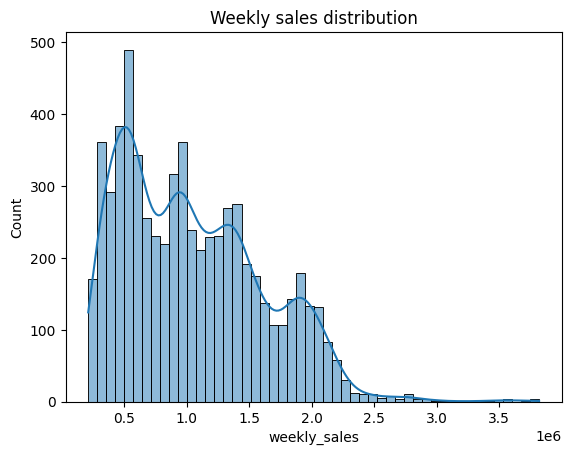

In [9]:
sns.histplot(df['weekly_sales'], kde=True , bins = 50)
plt.title('Weekly sales distribution')
plt.show()

### Plotting the weekly sales 

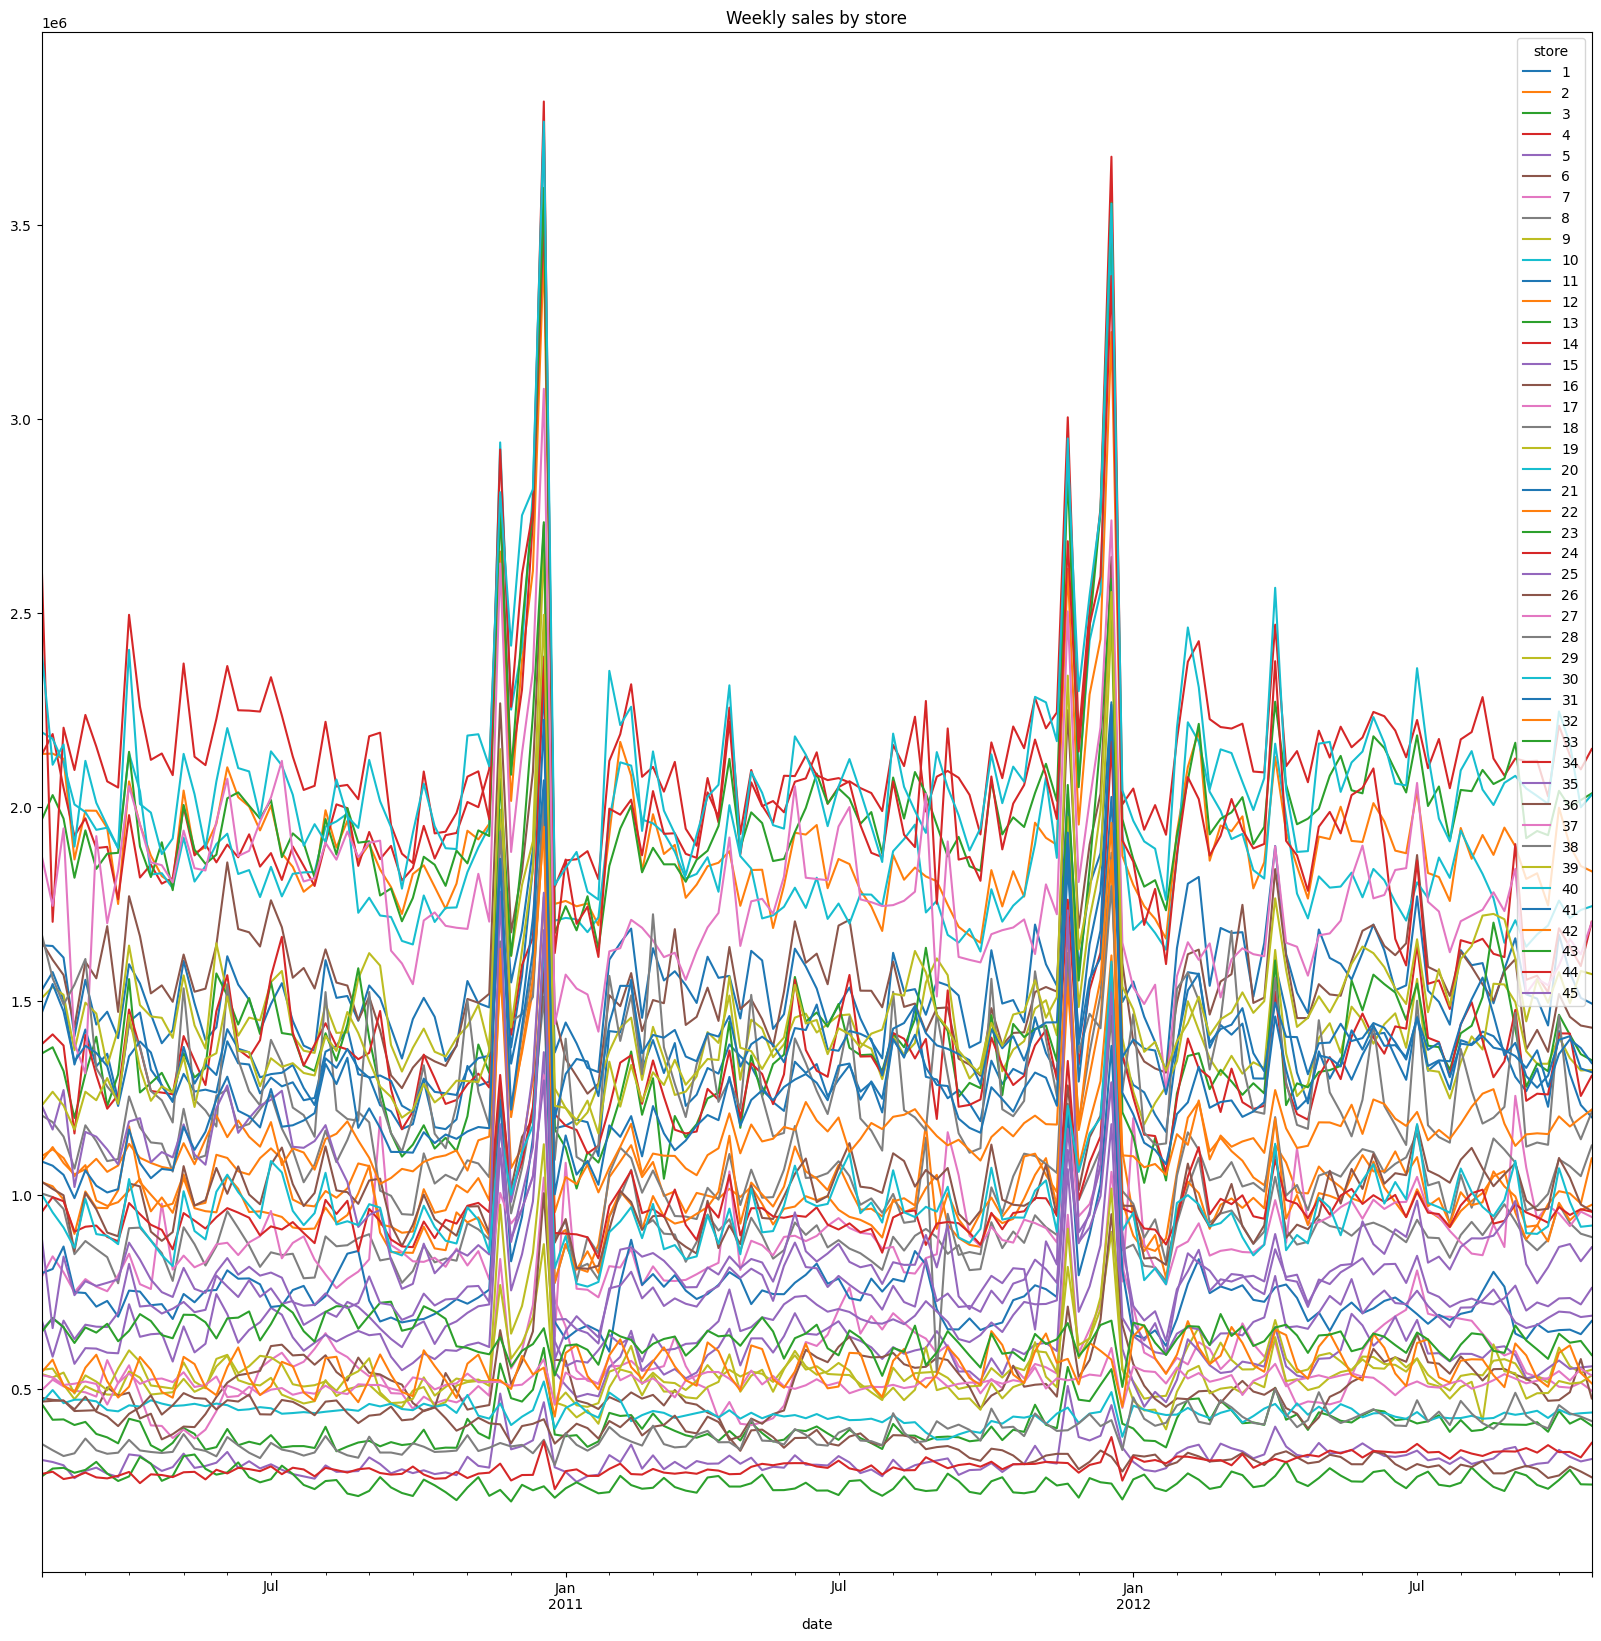

In [10]:
# Plotting the weekly sales of each store during the whole duration of the study

df.groupby(['store','date'])['weekly_sales'].sum().unstack(0).plot(figsize=(20,20)) 
plt.title('Weekly sales by store')
plt.show()


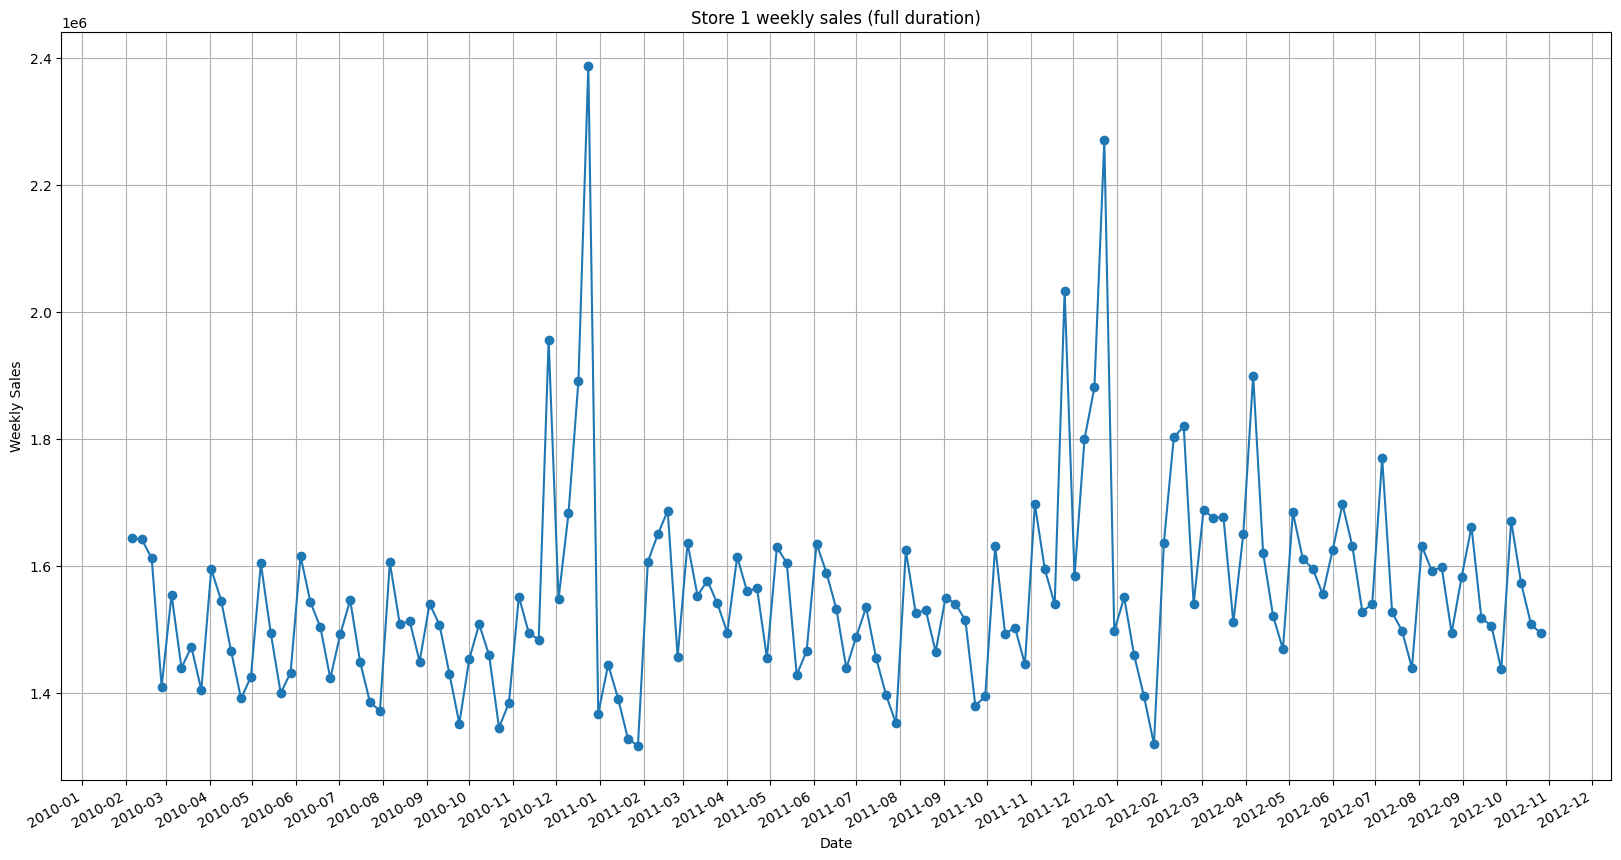

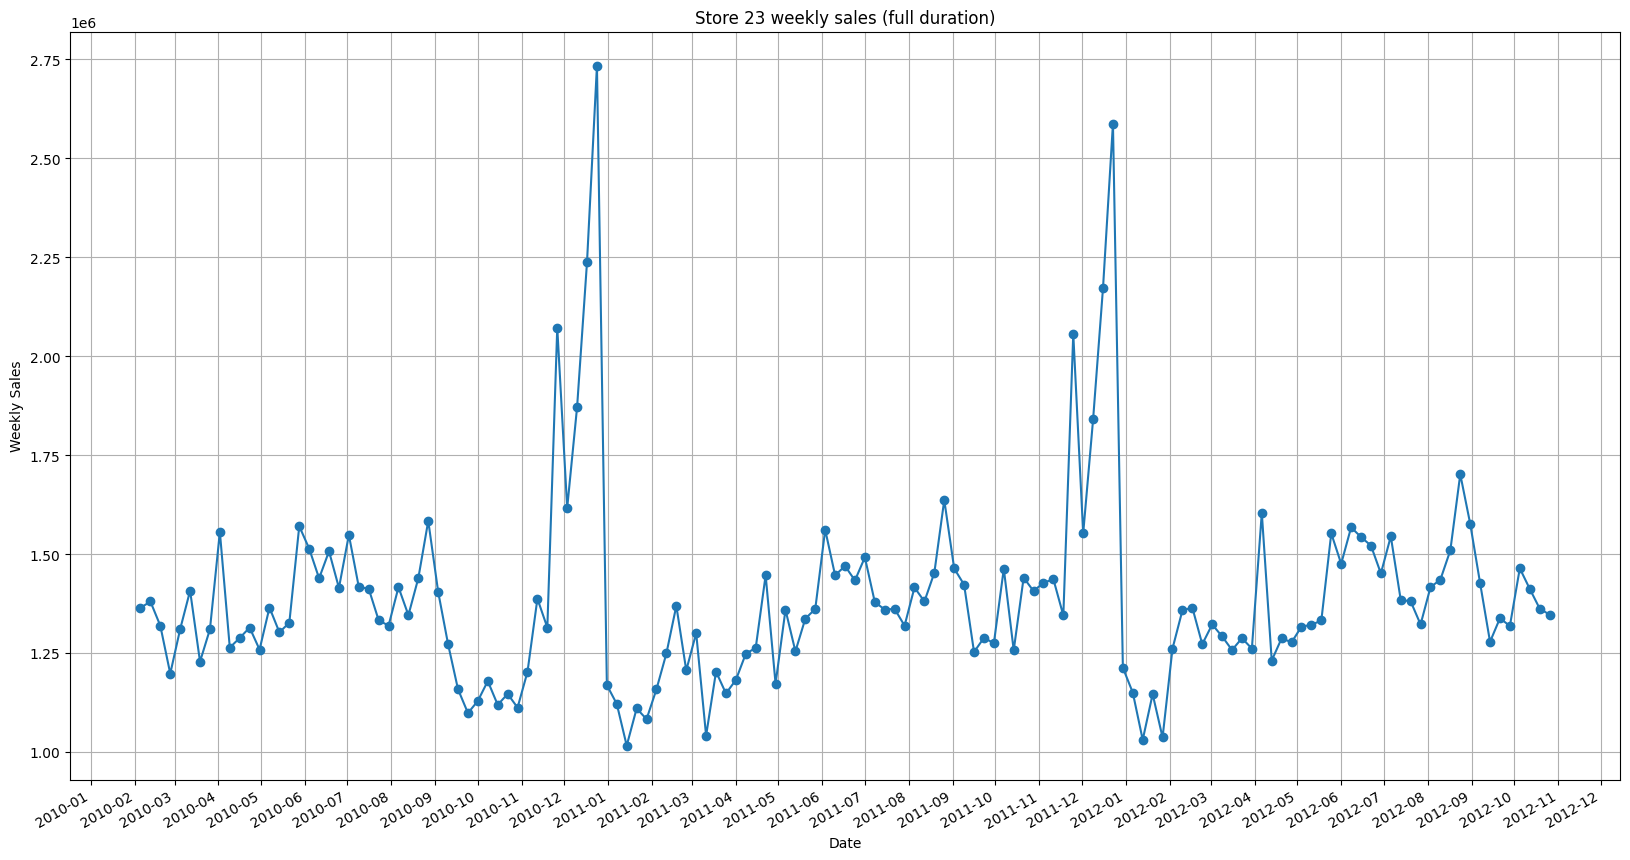

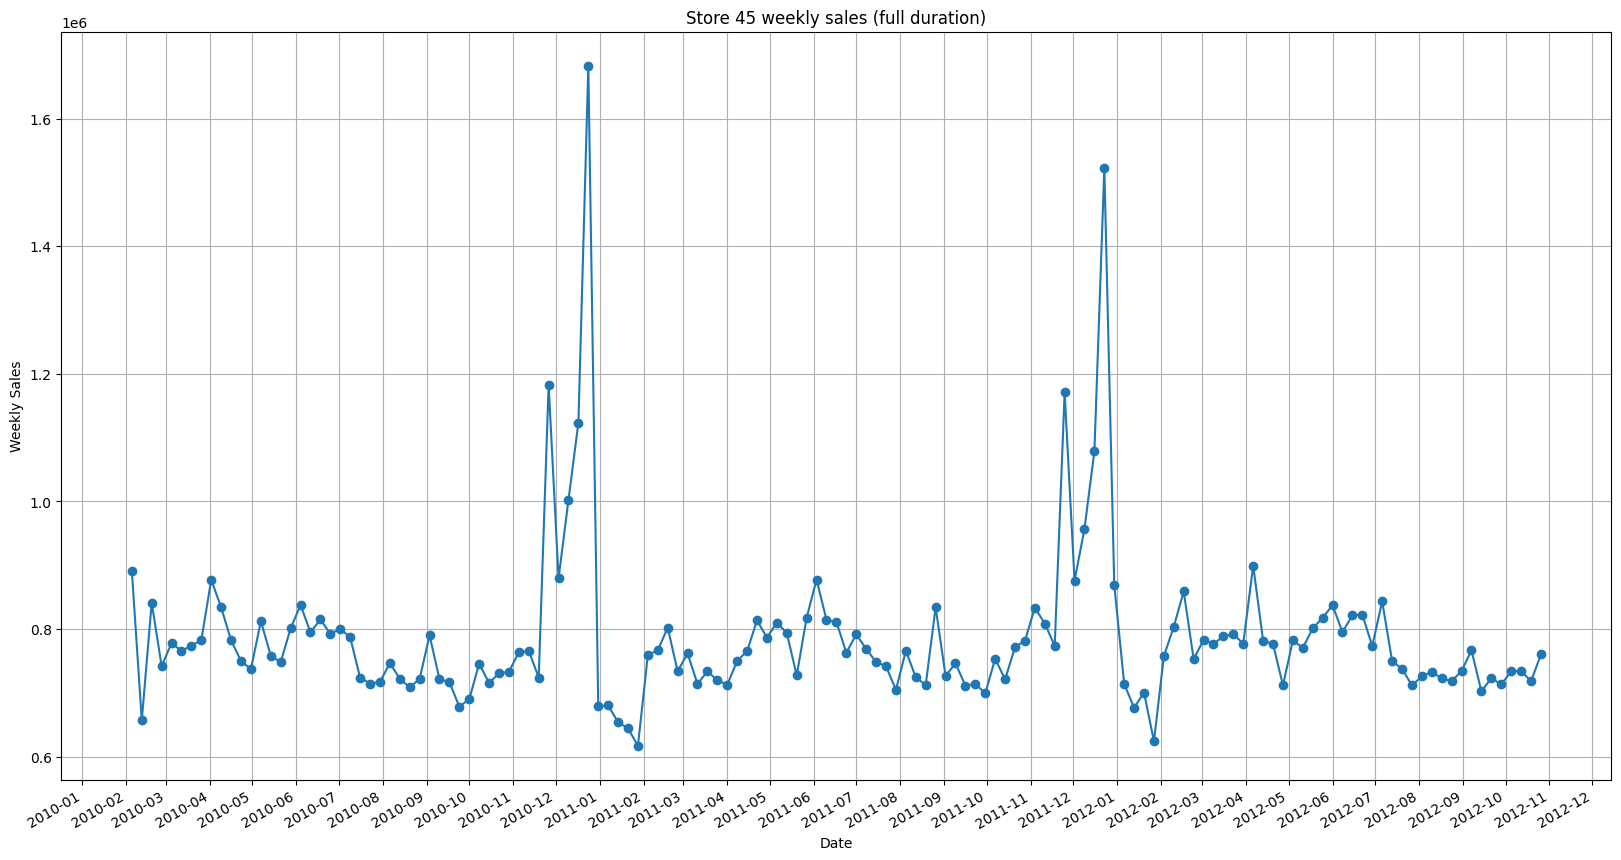

In [11]:
def plot_time_serie(df, store_number: int, duration="all"):
    """
    Plot the weekly sales of a given store in a given duration.

    Parameters:
        df (DataFrame): pandas dataframe.
        store_number (int): the number of the store to plot.
        duration (string): "all" or a date in %Y-%m-%d format.

    Returns:
        fig: A matplotlib Figure object.
    """

    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])

    mask = (df['store'] == store_number)
    if duration != "all":
        duration = pd.to_datetime(duration)
        mask &= (df['date'] < duration)

    sub = df.loc[mask].sort_values('date')

    fig, ax = plt.subplots(figsize=(20, 11))
    ax.plot(sub['date'], sub['weekly_sales'], marker='o', linestyle='-')

    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()

    ax.set_xlabel('Date')
    ax.set_ylabel('Weekly Sales')
    ax.set_title(
        f"Store {store_number} weekly sales before {duration.date()}" 
        if duration != "all" else 
        f"Store {store_number} weekly sales (full duration)"
    )
    ax.grid(True)

    return fig

# let's plot the weekly sales of 3 stores to check for patterns 
fig1 = plot_time_serie(df, 1)
fig2 = plot_time_serie(df, 23)
fig3 = plot_time_serie(df, 45)


We can see some sort of a seasonality in the plot of the 3 stores where the `weekly_sales` atteign a maximum value towards the end of the year and then drops to a minimum in January and February.  

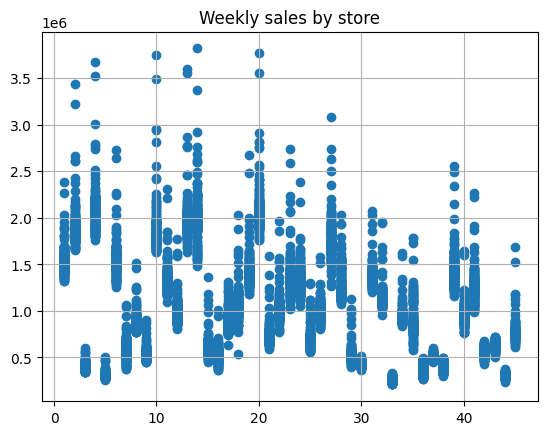

In [12]:
plt.scatter(df['store'], df['weekly_sales'])
plt.title("Weekly sales by store")
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_19884\3288008001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, y= "weekly_sales", x = 'store', palette='viridis')


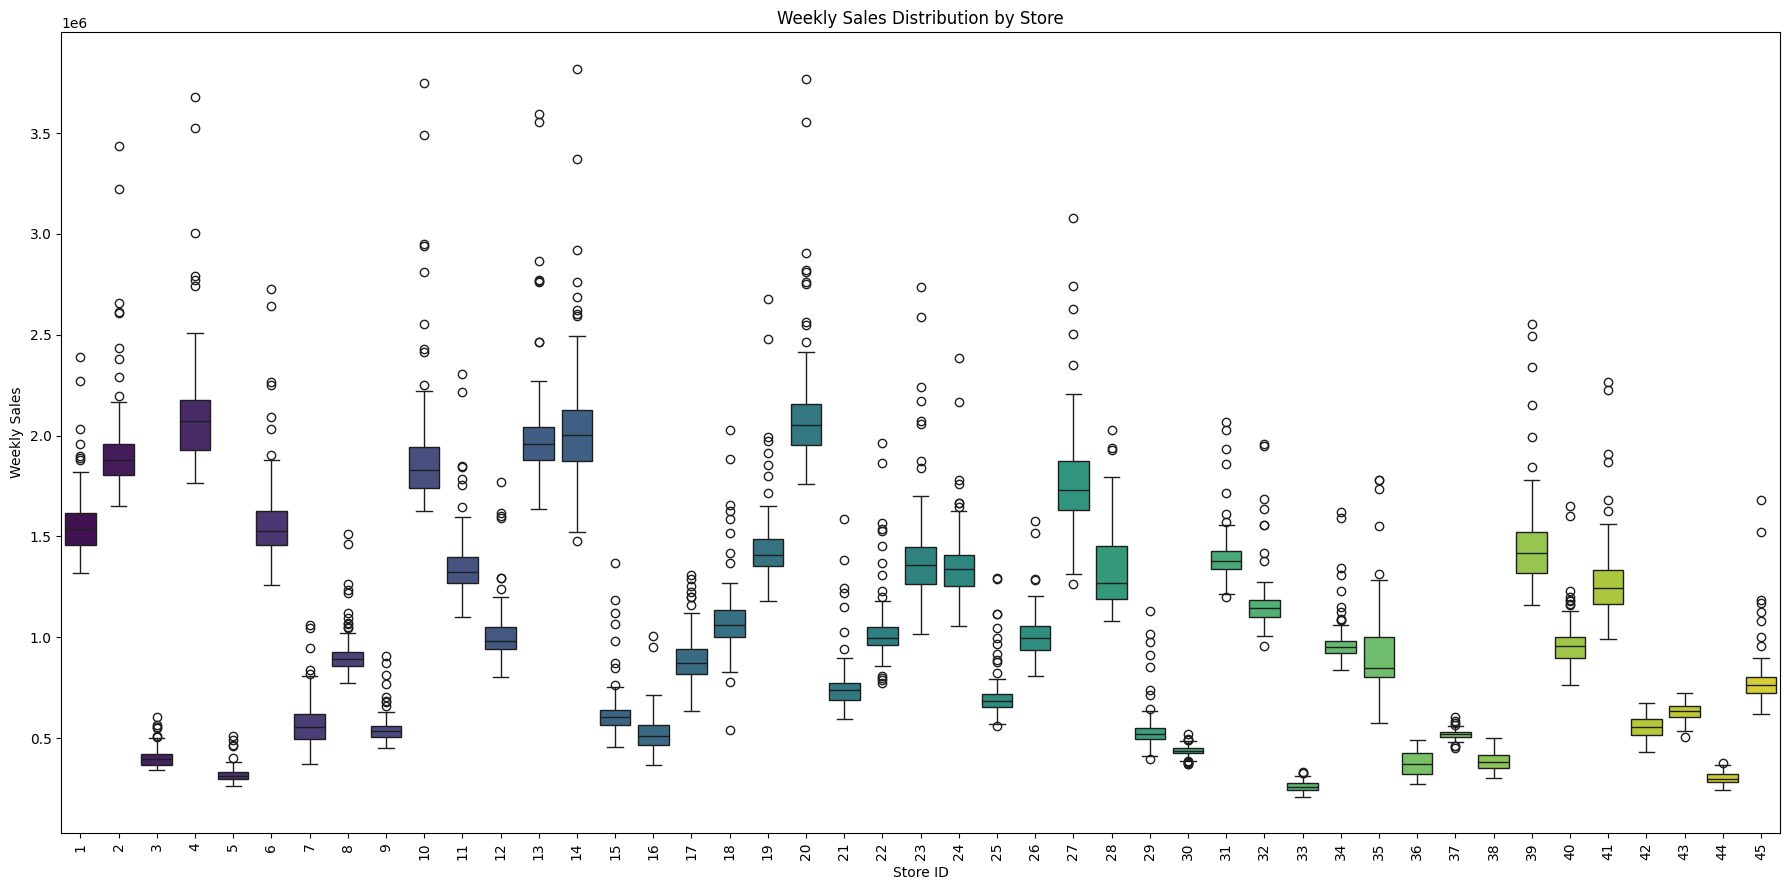

In [13]:
def plot_store_variation(df: pd.DataFrame):
    plt.figure(figsize=(18, 9))
    sns.boxplot(data = df, y= "weekly_sales", x = 'store', palette='viridis')
    plt.title("Weekly Sales Distribution by Store")
    plt.ylabel("Weekly Sales")
    plt.xlabel("Store ID")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
plot_store_variation(df)

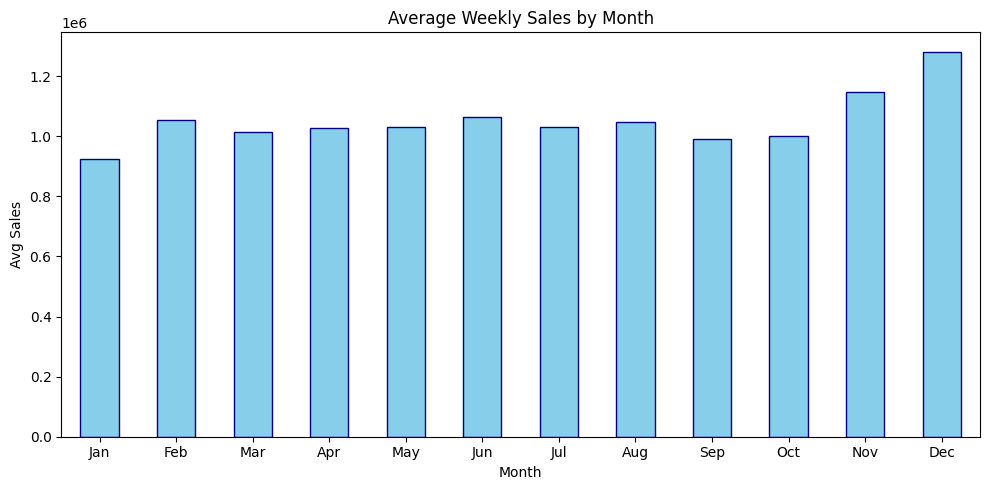

In [14]:
def plot_seasonality(df: pd.DataFrame):
    monthly = df.groupby(df['date'].dt.month)['weekly_sales'].mean()
    plt.figure(figsize=(10, 5))
    monthly.plot(kind='bar', color='skyblue', edgecolor='navy')
    plt.title("Average Weekly Sales by Month")
    plt.xlabel("Month"); plt.ylabel("Avg Sales")
    plt.xticks(ticks=range(12), labels=['Jan','Feb','Mar','Apr','May','Jun',
                                       'Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
    plt.tight_layout()
    plt.show()
 
plot_seasonality(df)    

### Exlporing other features effect on sales:


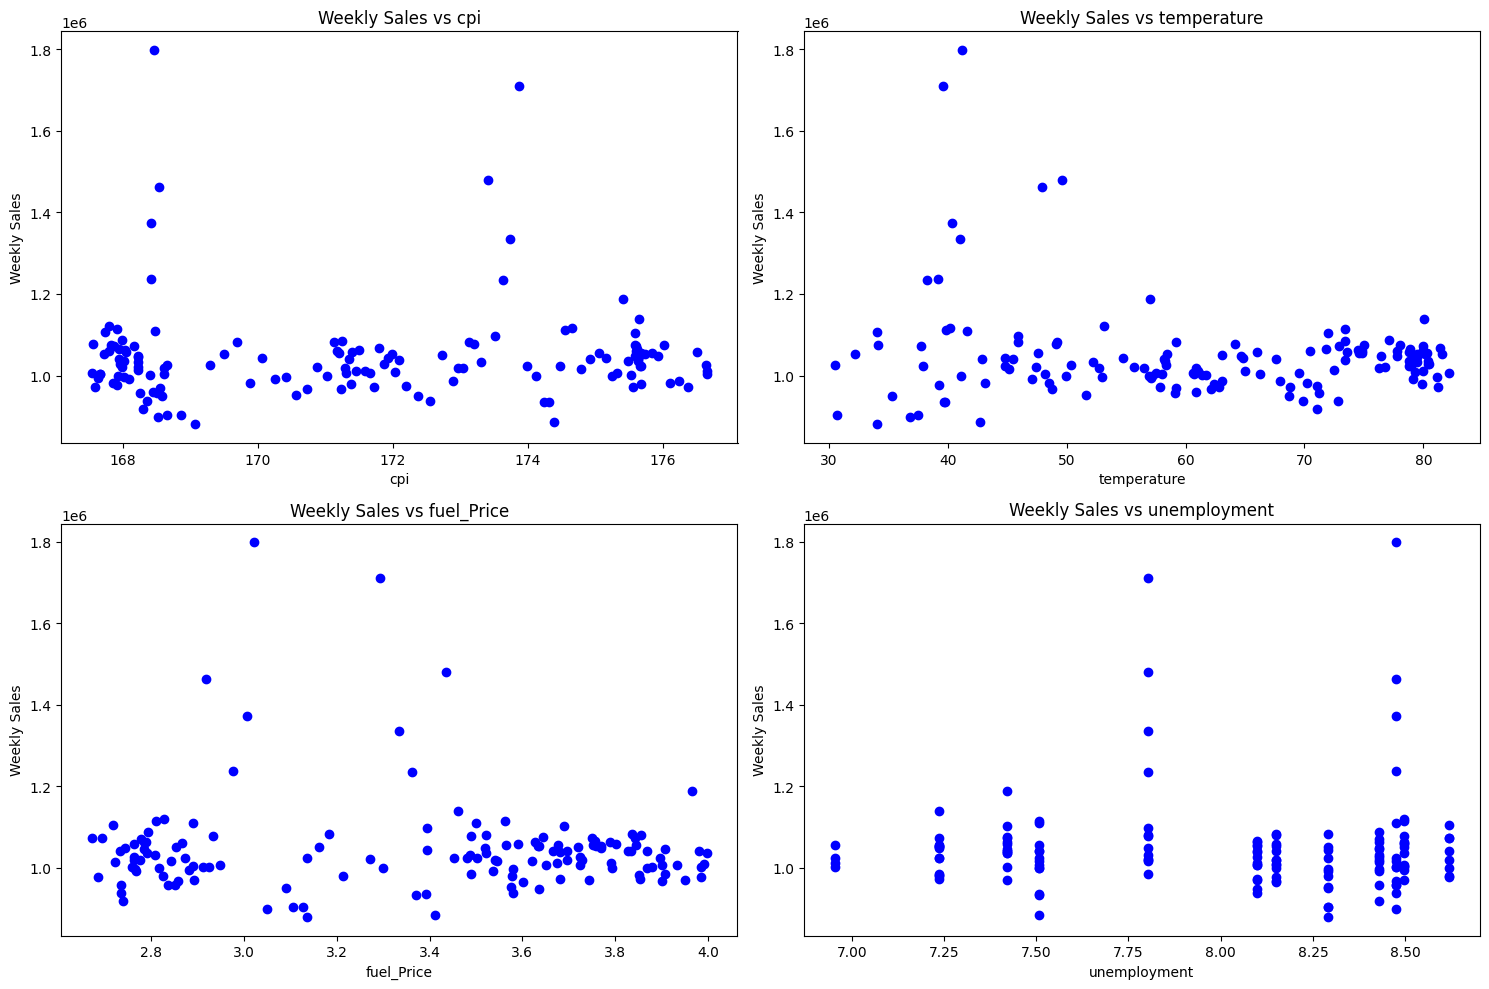

In [15]:
# Avereging the sales of all stores and grouping them by dates

avg_sales = df.groupby(df['date']).mean().reset_index()

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# List of features to plot
features = ['cpi', 'temperature', 'fuel_Price', 'unemployment']

# Flatten axes for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(avg_sales[feature], avg_sales['weekly_sales'], color='blue')
    axes[i].set_title(f"Weekly Sales vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Weekly Sales")

plt.tight_layout()
plt.show()


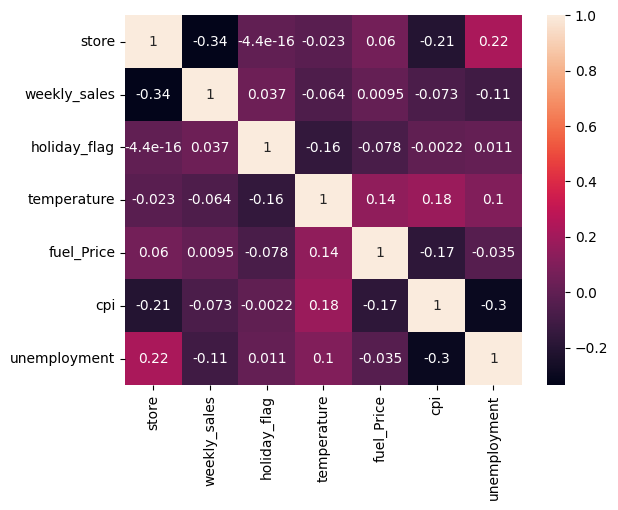

In [16]:
plt.Figure(figsize=(30,20))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

- The first plot shows that the features represent a random effect on the averaged `weekly_sales` as the values are randomly scattered and don't necessarily depend on said features
- According to the correlation heatmap, the `weekly_sales` present a very close to no correlation with said helping features. 
- Hence, the features `cpi`, `temperature`, `fuel_Price` and `unemployment` present low impact on the weekly_sales values. 


## Feature Engineering 

### Adding new time feature 

In [17]:
df['month'] =df['date'].dt.month 
df['Year'] =df['date'].dt.year

In [18]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


<Axes: xlabel='Year'>

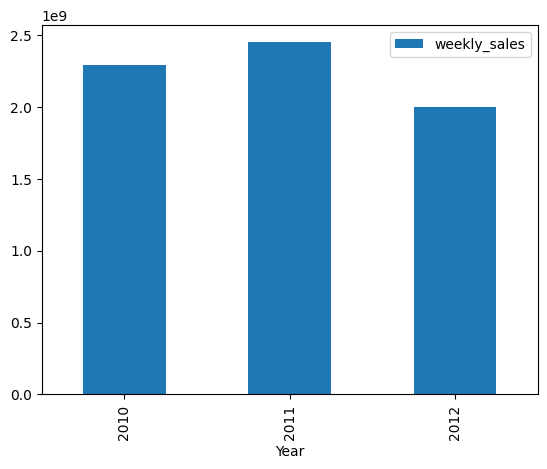

In [19]:
year_sales = pd.pivot_table(df, values='weekly_sales', index='Year', aggfunc='sum')
year_sales.plot(kind='bar')

<Axes: xlabel='month'>

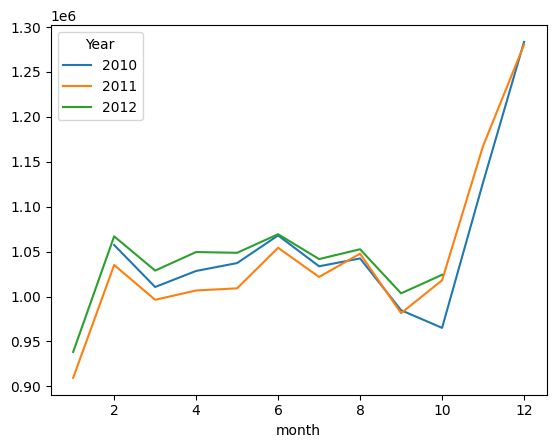

In [20]:
year_sales = pd.pivot_table(df, values='weekly_sales', index='month', columns='Year', aggfunc='mean')
year_sales.plot()

### Analyzing holidays

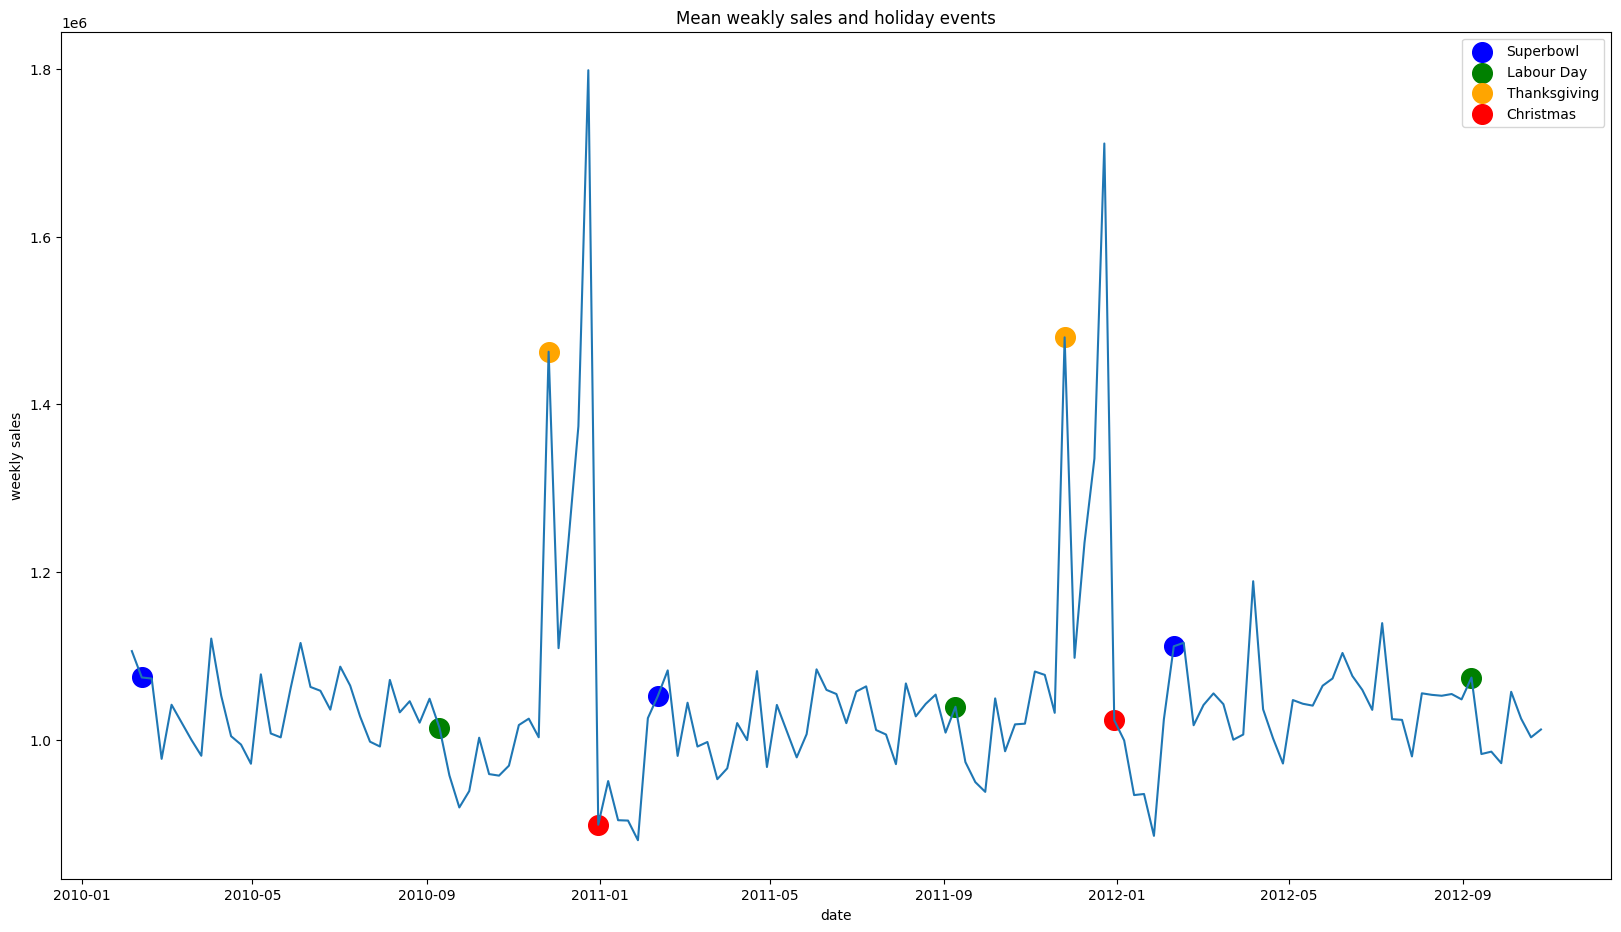

In [21]:
# Defining the holidays weeks across year

superbowl = [pd.Timestamp("2010-02-12"),pd.Timestamp("2011-02-11"),pd.Timestamp("2012-02-10") ]
labour_day = [ pd.Timestamp("2010-09-10"),pd.Timestamp("2011-09-9"),pd.Timestamp("2012-09-07")]
thanksgiving = [pd.Timestamp("2010-11-26"),pd.Timestamp("2011-11-25"),pd.Timestamp("2012-11-23")]
christmas = [pd.Timestamp("2010-12-31"),pd.Timestamp("2011-12-30"),pd.Timestamp("2012-12-28")] 

events = {
    "Superbowl": (superbowl, 'blue'),
    "Labour Day": (labour_day, 'green'),
    "Thanksgiving": (thanksgiving, 'orange'),
    "Christmas": (christmas, 'red')
}

# Plotting the mean weekly sales across all stores during the time period 
plt.figure(figsize=(20,11))
sub = df.groupby('date').mean().reset_index()
plt.plot(sub['date'], sub['weekly_sales'])

# Adding the holidays scatter plot 
for name, (dates, color) in events.items():
    highlight = sub[sub['date'].isin(dates)]
    plt.scatter(highlight['date'], highlight['weekly_sales'], s=200, color=color, label = name)

plt.legend()
plt.title("Mean weakly sales and holiday events")
plt.xlabel("date")
plt.ylabel("weekly sales")
plt.show()

- The mean `weekly_sales` is always higher near weeks containing holiday compared to normal weeks. 
- The maximum weekly_sales values are atteigned a week before christmas, which obviously makes total sense since it a very busy holiday where people tend to buy more gifts, consumables and other stuff. The year begins with minimum `weekly_sales` values due to the high sales value the week before.

### Holidays Feature Engineering 

In [22]:
df['is_superbowl']    = df['date'].isin(superbowl).astype(int)
df['is_laborday']     = df['date'].isin(labour_day).astype(int)
df['is_thanksgiving'] = df['date'].isin(thanksgiving).astype(int)
df['is_christmas']    = df['date'].isin(christmas).astype(int)

df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,month,Year,is_superbowl,is_laborday,is_thanksgiving,is_christmas
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,0,0,0,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010,1,0,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,0,0,0,0
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,0,0,0,0
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10,2012,0,0,0,0
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10,2012,0,0,0,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,0,0,0,0


### Adding lag features:


> To capture temporal dependance we will add lag features presenting a 1 week then 1 month lag 

In [23]:
# Sort by date to ensure correct shifting
df = df.sort_values('date')

# Create lagged features
df ['weekly_sales_lag_1'] = df.groupby('store')['weekly_sales'].shift(1)
df['weekly_sales_lag_4'] = df.groupby('store')['weekly_sales'].shift(4)


In [24]:
# Adding the rolling mean to capture trends

df['rolling_mean_4'] = df.groupby('store')['weekly_sales'].transform(lambda x: x.rolling(4).mean())

> Adding a 4 week rolling average reduce noise and help the model understand trend rather than just memory.


In [25]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,month,Year,is_superbowl,is_laborday,is_thanksgiving,is_christmas,weekly_sales_lag_1,weekly_sales_lag_4,rolling_mean_4
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010,0,0,0,0,NaN,NaN,NaN
1287,10,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765,2,2010,0,0,0,0,NaN,NaN,NaN
5148,37,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554,2,2010,0,0,0,0,NaN,NaN,NaN
2288,17,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548,2,2010,0,0,0,0,NaN,NaN,NaN
4147,30,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324,2,2010,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,10,2012,0,0,0,0,685531.85,683300.84,6.928317e+05
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,10,2012,0,0,0,0,313358.15,310141.68,3.253257e+05
5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,10,2012,0,0,0,0,918170.50,919595.44,9.727676e+05
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,10,2012,0,0,0,0,1048706.75,1002856.20,1.085627e+06


In [26]:
print(df[['weekly_sales', 'weekly_sales_lag_1', 'weekly_sales_lag_4', 'rolling_mean_4']].corr())


                    weekly_sales  weekly_sales_lag_1  weekly_sales_lag_4  \
weekly_sales            1.000000            0.951354            0.936730   
weekly_sales_lag_1      0.951354            1.000000            0.929262   
weekly_sales_lag_4      0.936730            0.929262            1.000000   
rolling_mean_4          0.975989            0.981468            0.959666   

                    rolling_mean_4  
weekly_sales              0.975989  
weekly_sales_lag_1        0.981468  
weekly_sales_lag_4        0.959666  
rolling_mean_4            1.000000  


In [27]:
df.isna().sum()

store                   0
date                    0
weekly_sales            0
holiday_flag            0
temperature             0
fuel_Price              0
cpi                     0
unemployment            0
month                   0
Year                    0
is_superbowl            0
is_laborday             0
is_thanksgiving         0
is_christmas            0
weekly_sales_lag_1     45
weekly_sales_lag_4    180
rolling_mean_4        135
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isna().sum()

store                 0
date                  0
weekly_sales          0
holiday_flag          0
temperature           0
fuel_Price            0
cpi                   0
unemployment          0
month                 0
Year                  0
is_superbowl          0
is_laborday           0
is_thanksgiving       0
is_christmas          0
weekly_sales_lag_1    0
weekly_sales_lag_4    0
rolling_mean_4        0
dtype: int64

In [30]:
df

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment,month,Year,is_superbowl,is_laborday,is_thanksgiving,is_christmas,weekly_sales_lag_1,weekly_sales_lag_4,rolling_mean_4
1863,14,2010-03-05,2237544.75,0,37.13,2.777,182.120157,8.992,3,2010,0,0,0,0,2095591.63,2623469.95,2.060478e+06
3293,24,2010-03-05,1412387.37,0,36.73,2.919,131.735000,8.326,3,2010,0,0,0,0,1158722.74,1388725.63,1.342645e+06
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010,0,0,0,0,1409727.59,1643690.90,1.554615e+06
1148,9,2010-03-05,507297.88,0,48.43,2.625,214.905472,6.415,3,2010,0,0,0,0,473773.27,549505.55,5.112691e+05
3007,22,2010-03-05,1009201.24,0,36.82,2.766,135.573260,8.283,3,2010,0,0,0,0,899761.48,1033017.37,9.800004e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3574,25,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293,10,2012,0,0,0,0,685531.85,683300.84,6.928317e+05
714,5,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422,10,2012,0,0,0,0,313358.15,310141.68,3.253257e+05
5719,40,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145,10,2012,0,0,0,0,918170.50,919595.44,9.727676e+05
2573,18,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243,10,2012,0,0,0,0,1048706.75,1002856.20,1.085627e+06


## Preprocessing 

Until now, the major changes done to the data are:
- changing date column type to datetime 
- adding month and year columns
- adding holiday specific features ( `is_superbowl` , `is_laborday`, `is_thanksgiving`, `is_christmas`	)
- adding lag features ( `weekly_sales_lag_1`, `weekly_sales_lag_4`)
- adding rolling mean on 4 weeks `rolling_mean_4`
- dropping rows containing NaN values due to the 2 last steps    


In [ ]:
def data_split(df, features, date = '2011-10-26'):
    
    # Sorting data based on date
    df = df.sort_values(['store', 'date']).reset_index(drop=True)
    # Train-test split: one year before the last date 
    split_date = pd.Timestamp(date)
    train = df[df['date'] <= split_date]
    test = df[df['date'] > split_date]

    X_train = train[features]
    y_train = train['weekly_sales']
    X_test = test[features]
    y_test = test['weekly_sales']
    
    return X_train, y_train, X_test, y_test 



## Model Training 

In order to predict the weekly_sales we will train 3 models:
- Linear Regression : A basic models to capture how it will compare to more advanced ones 

- Random Forest : An ensemble of decision trees that captures nonlinear patterns in the data. It is robust to noise and handles feature interactions well, making it effective for real-world sales data. 

- XGBoost : A gradient boosting model that builds trees sequentially, each one improving upon the previous errors. It is known for strong predictive performance and is widely used in forecasting competitions and production systems.

In [49]:
# For the sake of optimizing the notebook, we stored some function in a utils folder 

import sys
sys.path.append("..")

from utils.helper_plots import *
from utils.helper_metrics import *

### Linear Regression : 

In [57]:

def train_linear_regression(df, features):
    """
    Trains a Linear Regression model on selected features.

    Parameters:
    -----------
    df : DataFrame
        The dataset containing features + target.
    feature_cols : list
        Columns to use as model features.
    target_col : str
        Name of the target column.
    test_size : float
        Fraction of test split size.

    Returns:
    --------
    model : LinearRegression
        Trained LR model.
    X_test, y_test, y_pred : arrays
        Data used for evaluation.
    """

    # 1) Time-aware split 
    X_train, y_train, X_test, y_test  = data_split(df, features)
    
    # 3) Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 4) Predict
    y_pred = model.predict(X_test)

    # 5) Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    mape_val= mape(y_test,y_pred)
    print("=== Linear Regression Performance ===")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape_val:.2f} %")
    print("------------------------------------")

    return model, X_test, y_test, y_pred, (mae,rmse,mape_val) 


In [58]:
features = df.columns.drop(['date','weekly_sales'])
lr,X_test_lr, y_test_lr, y_pred_lr, metrics_lr= train_linear_regression(df, features)

=== Linear Regression Performance ===
MAE:  94768.7608
RMSE: 129477.0401
MAPE: 11.32 %
------------------------------------


In [59]:
features = ['rolling_mean_4', 'weekly_sales_lag_1', 'weekly_sales_lag_4','month','store','is_superbowl', 'is_laborday','is_thanksgiving','is_christmas']
lr,X_test_lr, y_test_lr, y_pred_lr,metrics_lr = train_linear_regression(df, features)

=== Linear Regression Performance ===
MAE:  66601.7061
RMSE: 111369.4547
MAPE: 6.98 %
------------------------------------


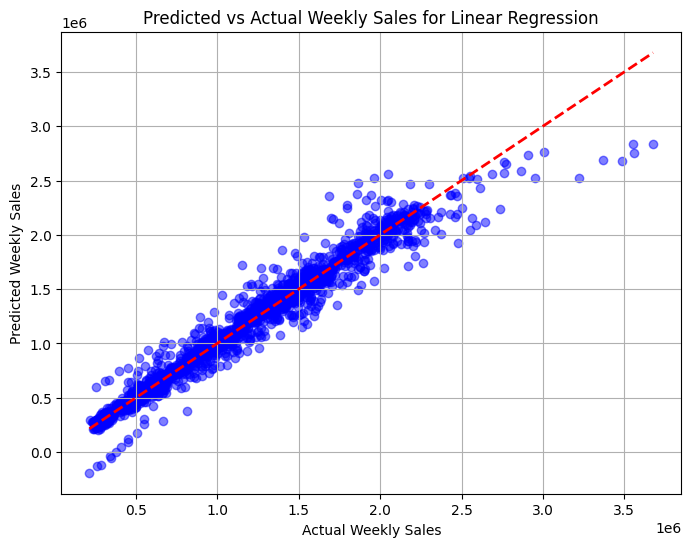

In [60]:
plot_predicted_vs_actual(y_test_lr,y_pred_lr, model = 'Linear Regression')

Points close to the red dashed line : good predictions.

Points far from the line : large errors (like holidays or extreme spikes).

Scatter spread shows how noisy your model is

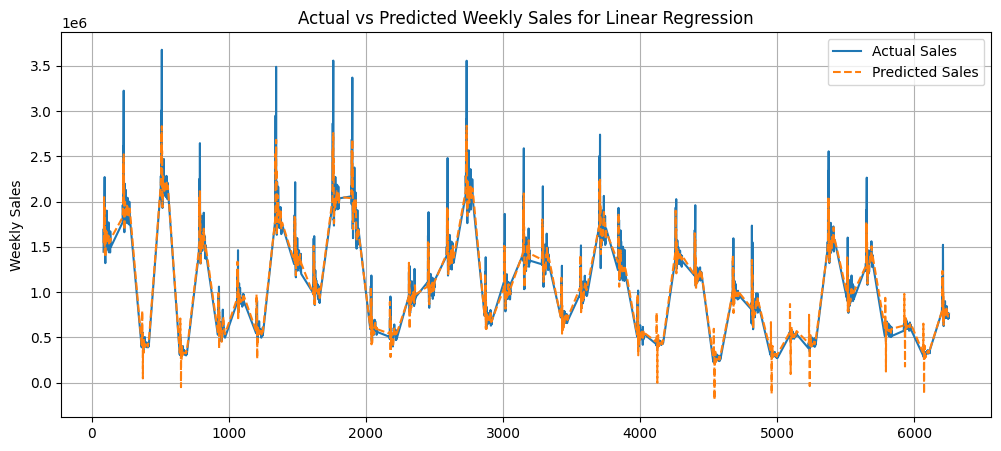

In [45]:
plot_actual_vs_predicted_time(df, y_test_lr, y_pred_lr, model = 'Linear Regression')

### Random Forest : 

In [ ]:
def run_rf_experiment(df,features,
                      n_estimators=300, max_depth=None, min_samples_split=5,
                      random_state=42, plot_importances=False, feature_names=None, top_n=None):
    """
    Trains a Random Forest and evaluates performance.

    Parameters
    ----------
    X_train, X_test : pd.DataFrame
        Train and test feature sets
    y_train, y_test : pd.Series
        Target values
    n_estimators, max_depth, min_samples_split : RF hyperparameters
    plot_importances : bool
        Whether to plot feature importances
    feature_names : list
        List of feature names for plotting
    top_n : int
        Number of top features to plot

    Returns
    -------
    y_pred : np.array
        Predictions on test set
    metrics : tuple
        (MAE, RMSE, MAPE)
    rf_model : trained RandomForestRegressor
    """
    
    X_train, y_train, X_test, y_test  = data_split(df, features)
    
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=random_state
    )

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mae, rmse, mape_val = evaluate_model(y_test, y_pred)

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape_val:.2f}%")

    if plot_importances and features is not None:
        plot_rf_feature_importances(rf_model, features, top_n=top_n)

    return rf_model , X_test, y_test, y_pred, (mae, rmse, mape_val) 

#### Test 1 : all features

MAE: 54735.07, RMSE: 81866.81, MAPE: 5.18%
Feature ranking:
1. rolling_mean_4 (0.9535)
2. weekly_sales_lag_1 (0.0179)
3. month (0.0064)
4. weekly_sales_lag_4 (0.0054)
5. is_christmas (0.0044)
6. is_thanksgiving (0.0040)
7. temperature (0.0025)
8. cpi (0.0016)
9. fuel_Price (0.0013)
10. unemployment (0.0012)
11. store (0.0010)
12. holiday_flag (0.0005)
13. is_superbowl (0.0001)
14. Year (0.0001)
15. is_laborday (0.0000)


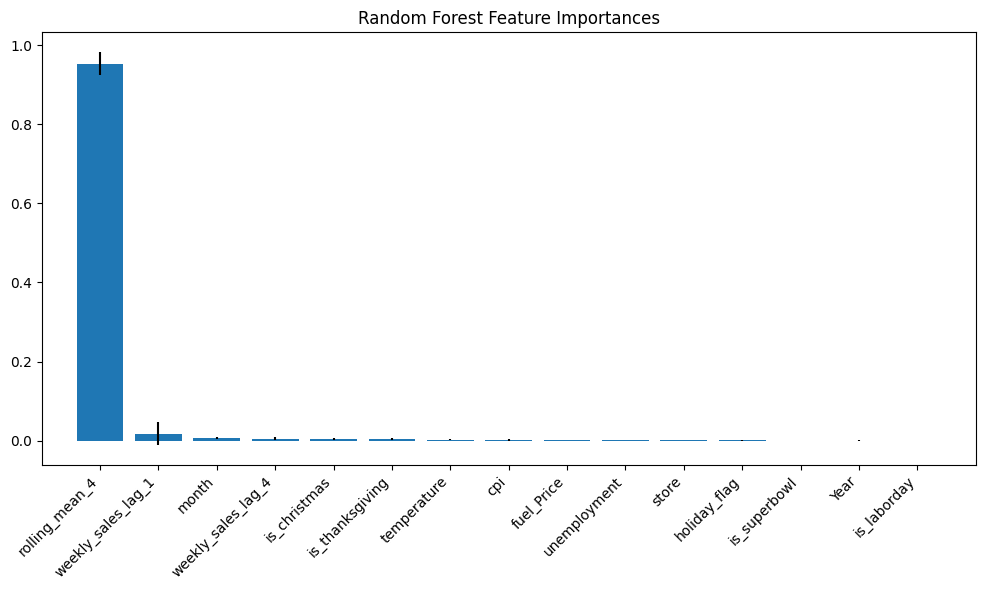

In [115]:
all_features = df.columns.drop(['date', 'weekly_sales'])

rf_model_all , X_test_all, y_test_all, y_pred_all, (mae_rf_all, rmse_rf_all, mape_val_rf_all)  = run_rf_experiment(df, all_features, plot_importances= True)

#### Test 2 : Most important features

MAE: 51477.00, RMSE: 77391.67, MAPE: 4.86%
Feature ranking:
1. rolling_mean_4 (0.9548)
2. weekly_sales_lag_1 (0.0195)
3. month (0.0078)
4. weekly_sales_lag_4 (0.0067)
5. is_christmas (0.0050)
6. is_thanksgiving (0.0043)
7. store (0.0016)
8. is_superbowl (0.0002)
9. is_laborday (0.0001)


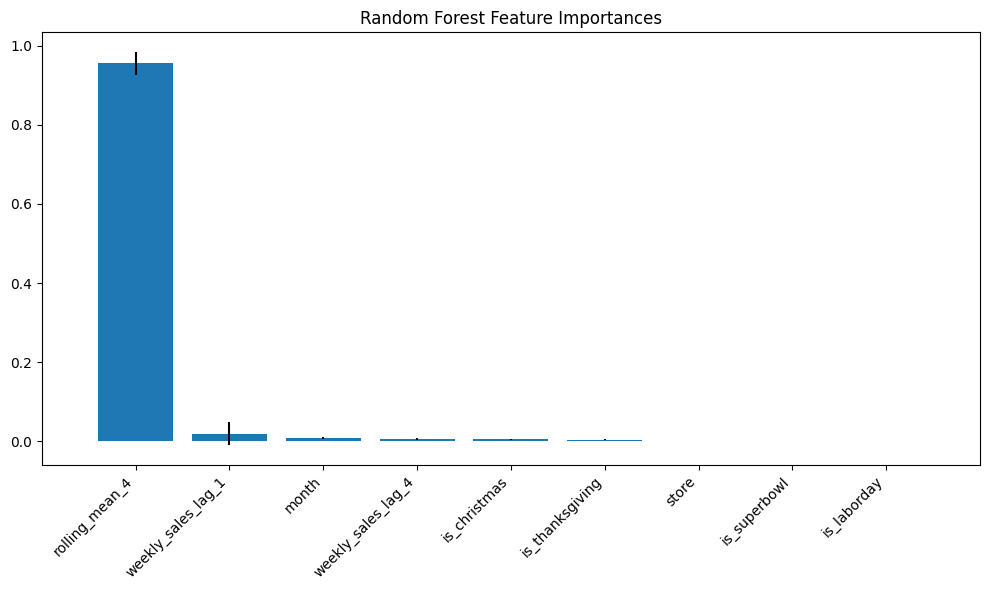

In [116]:
features_imp = ['rolling_mean_4', 'weekly_sales_lag_1', 'weekly_sales_lag_4','month','store','is_superbowl', 'is_laborday','is_thanksgiving','is_christmas']
rf_model_imp , X_test_imp, y_test_imp, y_pred_rf_imp, (mae_rf_imp, rmse_rf_imp, mape_val_rf_imp)  = run_rf_experiment(df, features_imp, plot_importances= True)


#### Test 3 : tuning some hyperparams

We could do some grid search but it will take a lot of time. I did some experimentation with `n_estimators` and `min_samples_split` and chose the best pair

In [127]:
rf_model_imp , X_test_imp, y_test_imp, y_pred_rf_imp, (mae_rf_imp, rmse_rf_imp, mape_val_rf_imp)  = run_rf_experiment(df, features_imp, plot_importances= False, n_estimators= 150,  min_samples_split= 2)


MAE: 50876.45, RMSE: 76548.12, MAPE: 4.81%


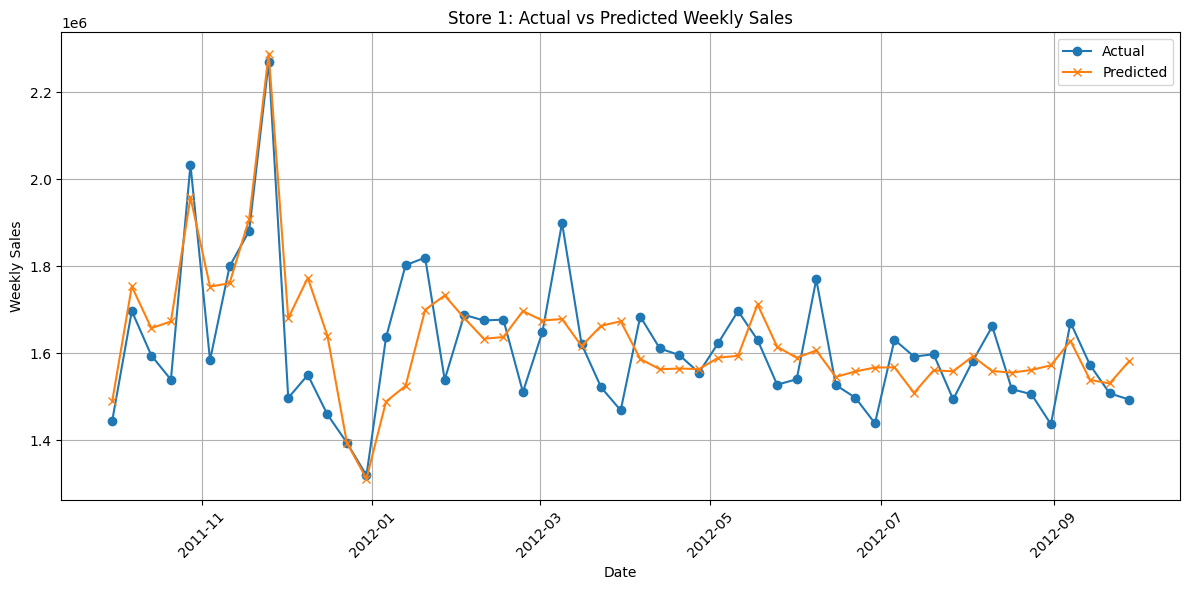

In [118]:
plot_store_predictions(df, X_test_imp, y_test_imp, 
                       store_number=1, 
                       model=rf_model_imp)


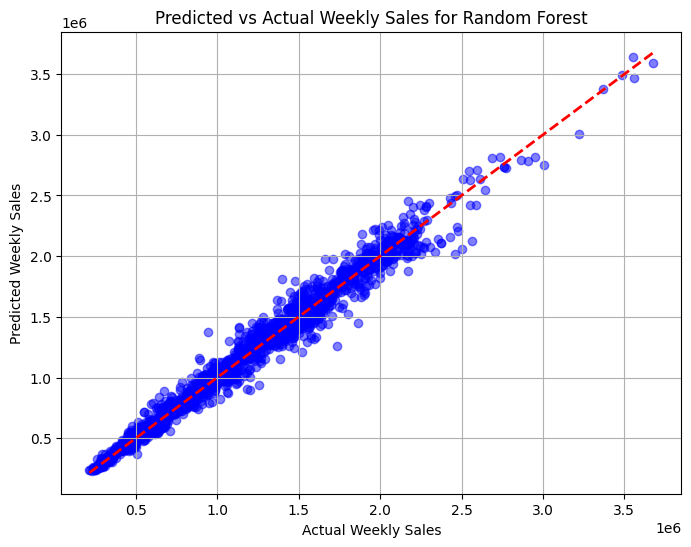

In [128]:
plot_predicted_vs_actual(y_test_imp , y_pred_rf_imp,  'Random Forest')

### XGBoost

In [83]:
def run_xgb_experiment(df, features, plot_importances = False, 
                       n_estimators=500, learning_rate=0.05, max_depth=6,
                       subsample=0.8, colsample_bytree=0.8,
                       random_state=42):
    """
    Trains an XGBoost Regressor and evaluates performance.

    Parameters
    ----------
    X_train, X_test : pd.DataFrame
        Train and test feature sets
    y_train, y_test : pd.Series
        Target values
    n_estimators, learning_rate, max_depth, subsample, colsample_bytree : hyperparameters

    Returns
    -------
    y_pred : np.array
        Predictions on test set
    metrics : tuple
        (MAE, RMSE, MAPE)
    xgb_model : trained XGBRegressor
    """
    
    X_train, y_train, X_test, y_test  = data_split(df, features)
    
    xgb_model = xgb.XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=random_state
    )

    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    mae, rmse, mape_val = evaluate_model(y_test, y_pred)

    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape_val:.2f}%")
    
    if plot_importances and features is not None:
        plot_xgb_feature_importances(xgb_model, features)

    return xgb_model , X_test, y_test, y_pred, (mae, rmse, mape_val)


#### Test 1 : all features

MAE: 48961.21, RMSE: 73730.98, MAPE: 4.65%


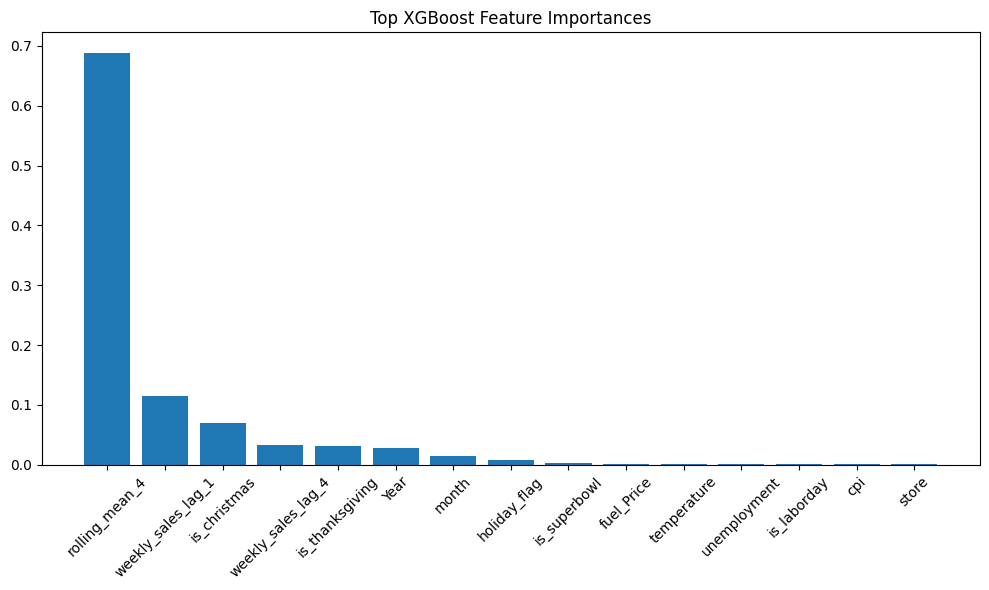

In [87]:
xgb_model_all , X_test_all, y_test_all, y_pred_rf_all, (mae_xgb_all, rmse_xgb_all, mape_val_xgb_all)  = run_xgb_experiment(df, all_features, plot_importances= True)

#### Test 2 : Important Features

MAE: 46126.58, RMSE: 71391.84, MAPE: 4.31%


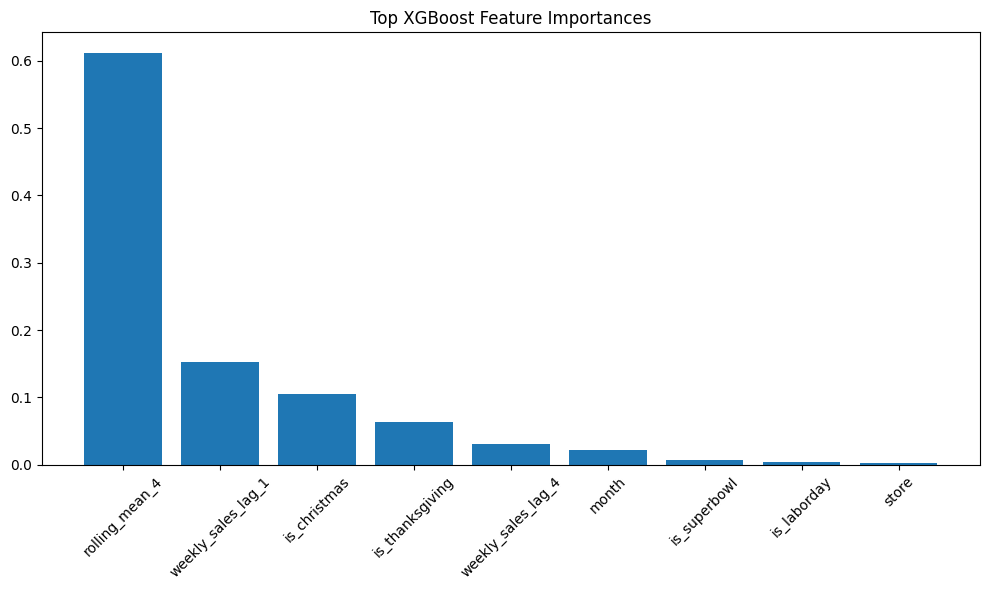

In [119]:
# Using the engineered features
xgb_model_imp , X_test_imp , y_test_imp, y_pred_rf_imp, (mae_xgb_imp, rmse_xgb_imp, mape_val_xgb_imp)  = run_xgb_experiment(df, features_imp, plot_importances= True)

#### Test 3 : Tuninng 

I tried a bunch of hyperparams like changing the `n_estimators`, `learning_rate` or `max_depth` 
> the best are `(500, 0.05, 7)`

In [125]:
# Using the engineered features
xgb_model_imp , X_test_imp , y_test_imp, y_pred_xgb_imp, (mae_xgb_imp, rmse_xgb_imp, mape_val_xgb_imp)  = run_xgb_experiment(df, features_imp, 
                                                                                                                            plot_importances= False,
                                                                                                                            n_estimators=500, learning_rate=0.05,max_depth=7)

MAE: 46146.05, RMSE: 71272.45, MAPE: 4.30%


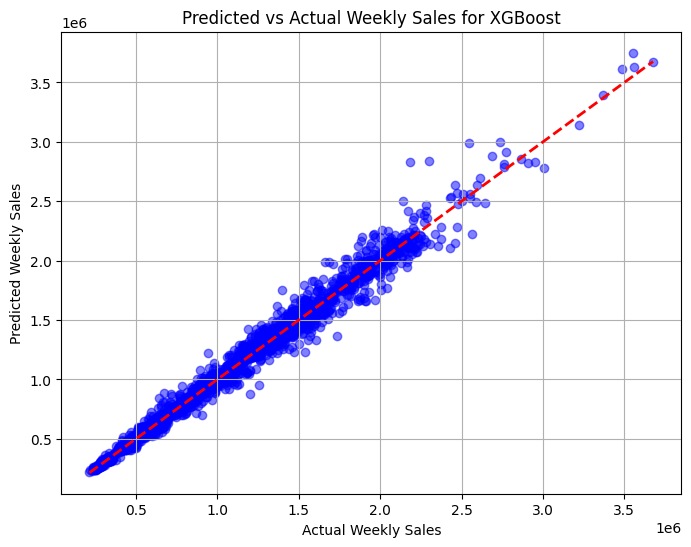

In [126]:
plot_predicted_vs_actual( y_test_imp , y_pred_xgb_imp, 'XGBoost')

### Comparison : 

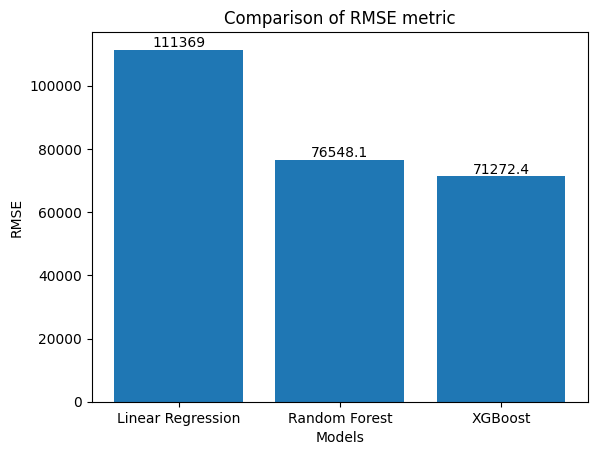

In [129]:
model_name = ['Linear Regression', 'Random Forest', 'XGBoost']
metrics= [metrics_lr[1], rmse_rf_imp, rmse_xgb_imp]

bar = plt.bar(model_name, metrics)
plt.title("Comparison of RMSE metric")
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.bar_label(bar)
plt.show()


# Saving the models 

In [142]:
X = df[features_imp]
y = df['weekly_sales']

In [150]:
lr_model_all_data = LinearRegression()
lr_model_all_data.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [151]:
xgb_model_all_data = xgb.XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=7,
    subsample=0.8, colsample_bytree=0.8,
    random_state=42
)

xgb_model_all_data.fit(X, y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [152]:
rf_model_all_data = RandomForestRegressor( n_estimators=150, max_depth=None, min_samples_split=2, random_state=42)                     

rf_model_all_data.fit(X, y)

,n_estimators,150
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [155]:
import os
import joblib

# Make sure the folder exists
os.makedirs("../models", exist_ok=True)

# Example: save your models
joblib.dump(lr, "../models/linear_regression.pkl")
joblib.dump(rf_model_imp, "../models/random_forest.pkl")
joblib.dump(xgb_model_imp, "../models/xgboost.pkl")
joblib.dump(lr_model_all_data, "../models/linear_regression_all.pkl")
joblib.dump(rf_model_all_data, "../models/random_forest_all.pkl")
joblib.dump(xgb_model_all_data, "../models/xgboost_all.pkl")


['../models/xgboost_all.pkl']